Assignment 2: Bitcoin Data Analysis

This analysis aims to explore long-term trends and behavioral patterns in Bitcoin prices using minute-level historical data.

Data Source: https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data

Library used: Pandas, Matplotlib, NumPy, Sklearn

The dataset has over 7 million rows which includes columns such as Timestamp, Open, High, Low, Close, Volume (BTC), Volume (Currency), Weighted Price.

Key questions:

How has Bitcoin’s price evolved from a few dollars to tens of thousands? 
What is the average monthly return, and are there consistent patterns during the same months across years (e.g., January)? 
Are some weekdays more volatile or active than others? 
How does Bitcoin's average daily return compare to its risk, measured by standard deviation? 
Using Linear Regression and KNN Model to predict the future value of Bitcoin.

These insights are meaningful for understanding market behavior, managing investment risk, and identifying potential trading opportunities.

In [98]:
import pandas as pd

df = pd.read_csv('bitcoin_data.csv')

First 3 rows of data


In [ ]:
df.head(3)

,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0


In [100]:
#last 3 rows
df.tail(3)

,Timestamp,Open,High,Low,Close,Volume
7025485,1.747011e+09,104386.0,104391.0,104366.0,104390.0,0.021357
7025486,1.747011e+09,104390.0,104438.0,104359.0,104438.0,0.045437
7025487,1.747011e+09,104442.0,104501.0,104438.0,104501.0,0.004754


Shape of data(rows, cols)


In [ ]:
df.shape

(7025488, 6)

Checking for empty and null value


In [ ]:
df.isnull().sum()

Timestamp    0
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64

Statistics summary


In [ ]:
df.describe()

,Timestamp,Open,High,Low,Close,Volume
count,7.025488e+06,7.025488e+06,7.025488e+06,7.025488e+06,7.025488e+06,7.025488e+06
mean,1.536177e+09,1.757240e+04,1.757937e+04,1.756521e+04,1.757240e+04,5.292601e+00
std,1.216864e+08,2.431614e+04,2.432412e+04,2.430796e+04,2.431611e+04,2.249773e+01
min,1.325412e+09,3.800000e+00,3.800000e+00,3.800000e+00,3.800000e+00,0.000000e+00
25%,1.430794e+09,4.249900e+02,4.250500e+02,4.249000e+02,4.249900e+02,1.810409e-02
50%,1.536177e+09,6.617245e+03,6.620130e+03,6.613205e+03,6.616980e+03,4.663035e-01
75%,1.641559e+09,2.746017e+04,2.746700e+04,2.745400e+04,2.746000e+04,3.026377e+00
max,1.747011e+09,1.091110e+05,1.093560e+05,1.087940e+05,1.090360e+05,5.853852e+03


Looking at random sample data


In [ ]:
df.sample(3)

,Timestamp,Open,High,Low,Close,Volume
4458218,1.592905e+09,9626.40,9636.30,9626.40,9636.30,5.505483
911558,1.380106e+09,124.97,124.97,124.97,124.97,1.000000
858405,1.376916e+09,102.93,102.93,102.93,102.93,0.000000


Convert unix timestamp  into readable date and adding column.

In [105]:
#creating new 'Date" column and converting unix timestamp
df['Date'] = pd.to_datetime(df['Timestamp'], unit='s')

In [106]:
# sample data after date is added
df[['Date','Timestamp','Open','Close']].sample(5)

,Date,Timestamp,Open,Close
5435203,2022-05-02 20:44:00,1.651524e+09,38704.85,38708.71
2149955,2016-02-02 10:36:00,1.454409e+09,373.33,373.33
1809448,2015-06-10 23:29:00,1.433979e+09,228.25,228.15
5223334,2021-12-06 17:35:00,1.638812e+09,48789.82,48784.71
809873,2013-07-16 19:54:00,1.374004e+09,92.58,92.58


Visualize and the price change of Bitcoin over time.

In [107]:
import matplotlib.pyplot as plt

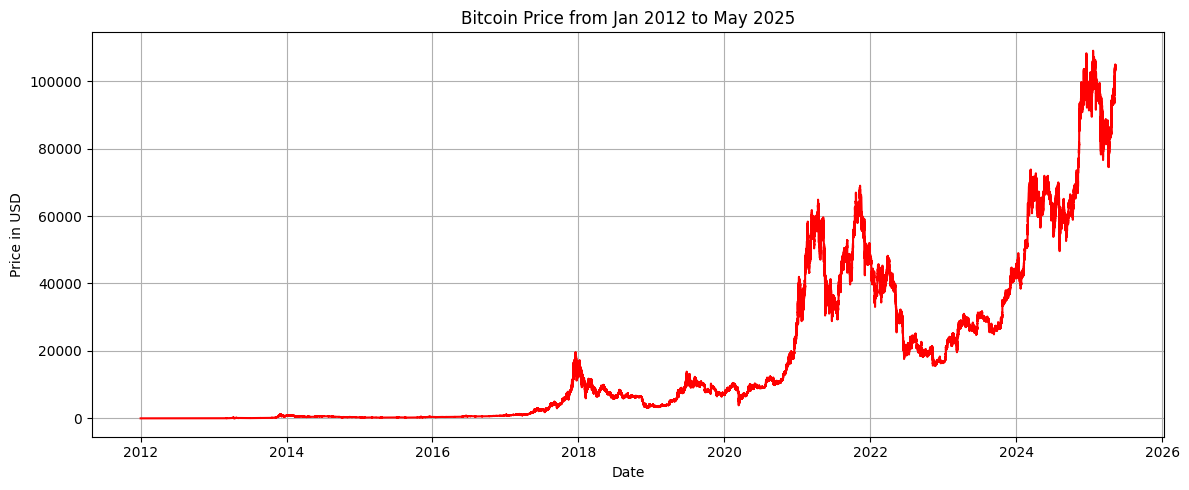

In [108]:
plt.figure(figsize=(12,5))
plt.plot(df['Date'],df['Close'],color='red')
plt.title('Bitcoin Price from Jan 2012 to May 2025')
plt.xlabel("Date")
plt.ylabel('Price in USD')
plt.grid(True)
plt.tight_layout()
plt.show()

Lets extract the year, month and day of the week in different columns for deeper analysis.

In [109]:
#add new data related columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.day_name()

Sample data after date (year, month, dayofweek) is added


In [ ]:
df[['Date','Year','Month','DayOfWeek','Open','Close']].sample(5)

,Date,Year,Month,DayOfWeek,Open,Close
4822225,2021-03-03 04:26:00,2021,3,Wednesday,48133.17,48133.47
1149274,2014-03-09 12:35:00,2014,3,Sunday,620.00,620.00
1202549,2014-04-15 12:30:00,2014,4,Tuesday,488.00,488.34
2210855,2016-03-15 17:36:00,2016,3,Tuesday,416.70,416.70
3046811,2017-10-17 06:12:00,2017,10,Tuesday,5630.74,5625.01


How did the average closing price has changed over time?
To understand the long term  trend of Bitcoin.

Yearly average growth visualization.

In [111]:
#Average closing price per year
yearly_avg = df.groupby('Year')['Close'].mean()

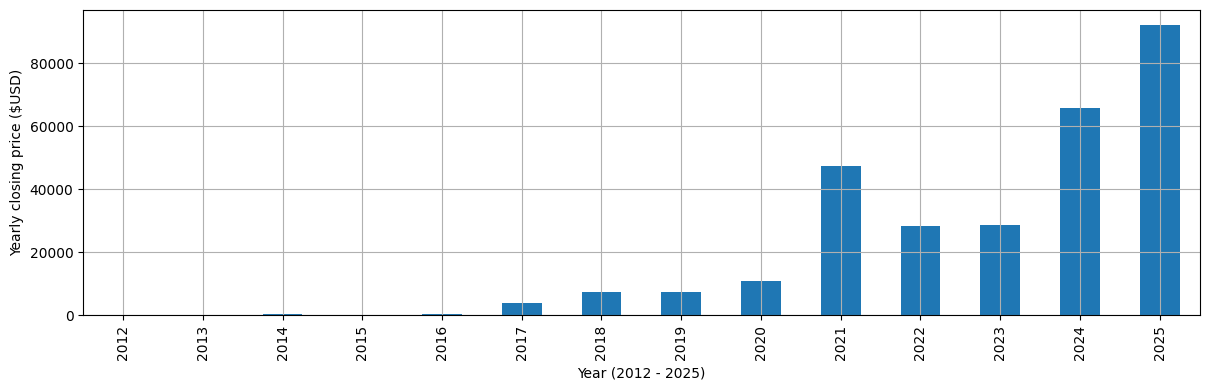

In [112]:
#Plot
plt.figure(figsize=(12,4))
yearly_avg.plot(kind='bar')
plt.tight_layout()
plt.grid(True)
plt.xlabel('Year (2012 - 2025)')
plt.ylabel('Yearly closing price ($USD)')
plt.show()

Monthly average growth visualization.

In [113]:
#How prices fluate on each month
monthly_avg = df.groupby('Month')['Close'].mean()

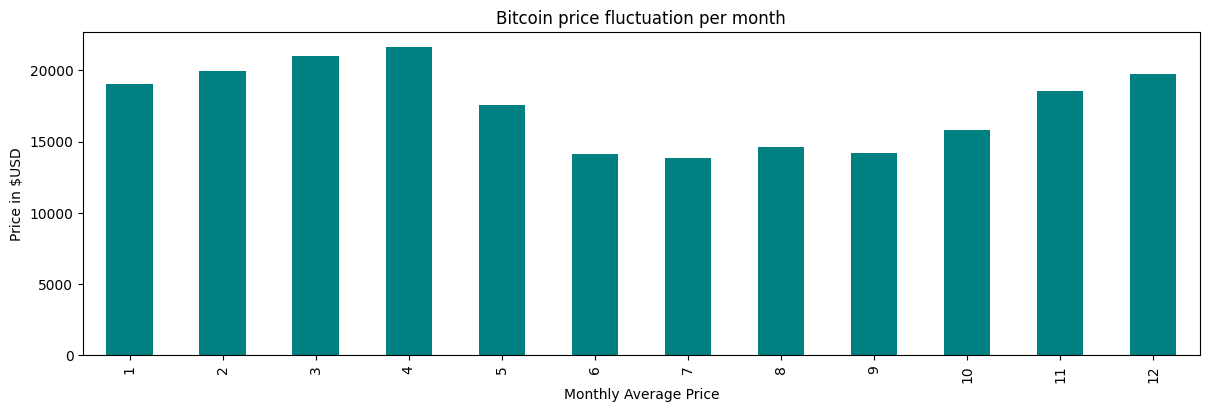

In [114]:
plt.figure(figsize=(12,4))
monthly_avg.plot(kind='bar', color="teal")
plt.tight_layout()
plt.title("Bitcoin price fluctuation per month")
plt.xlabel("Monthly Average Price")
plt.ylabel("Price in $USD")
plt.show()

Average Monthly Return

C:\Users\wecda\AppData\Local\Temp\ipykernel_8604\812877061.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_return = df['Close'].resample('M').ffill().pct_change()


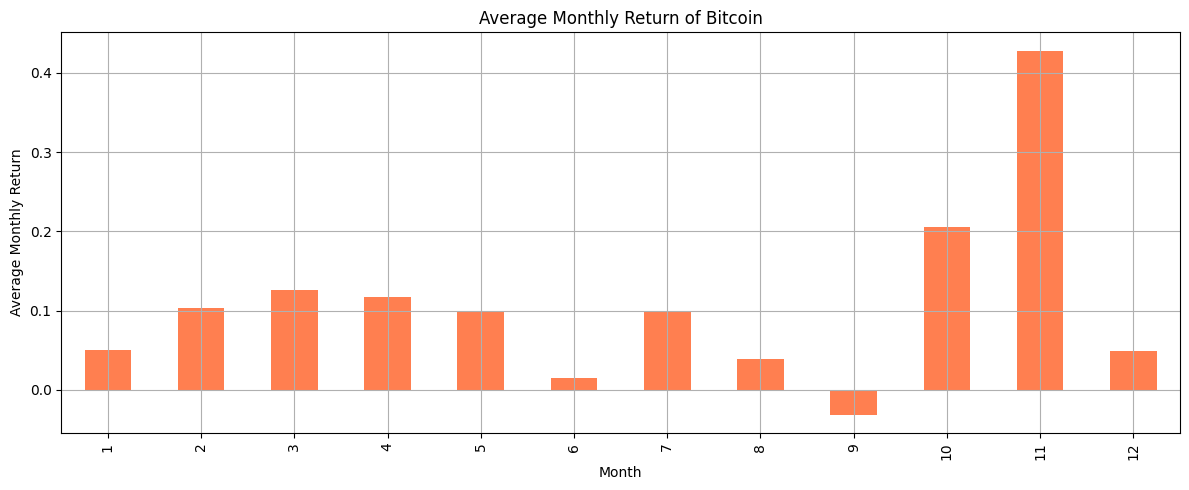

In [ ]:
# Calculate daily return
df['Daily_Return'] = df['Close'].pct_change()

# Calculate monthly return
monthly_return = df['Close'].resample('M').ffill().pct_change()

# Plot average monthly return
plt.figure(figsize=(12, 5))
monthly_return.groupby(monthly_return.index.month).mean().plot(kind='bar', color='coral')
plt.title('Average Monthly Return of Bitcoin')
plt.xlabel('Month')
plt.ylabel('Average Monthly Return')
plt.grid(True)
plt.tight_layout()
plt.show()


Checking which Day of week has the most volatility.


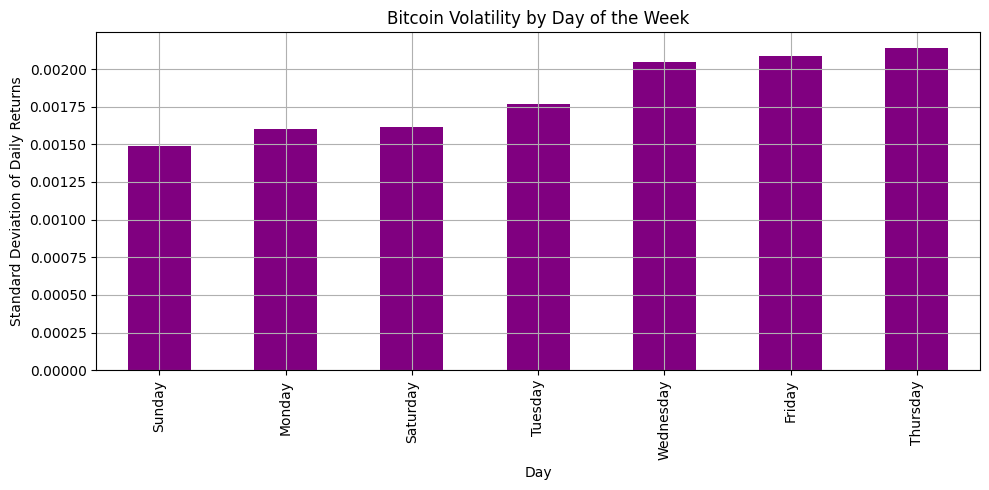

In [ ]:
volatility_by_day = df.groupby('DayOfWeek')['Daily_Return'].std().sort_values()

# Plot
plt.figure(figsize=(10, 5))
volatility_by_day.plot(kind='bar', color='purple')
plt.title('Bitcoin Volatility by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Standard Deviation of Daily Returns')
plt.grid(True)
plt.tight_layout()
plt.show()


Group by Day and calculate mean and std


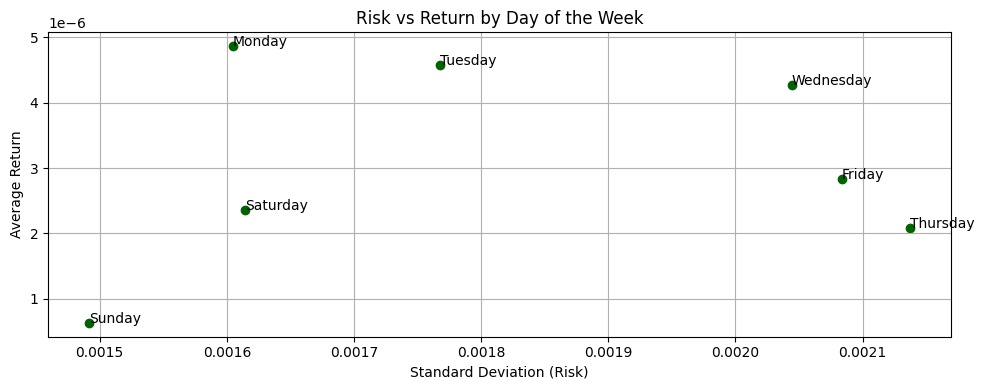

In [ ]:
grouped = df.groupby('DayOfWeek')['Daily_Return'].agg(['mean', 'std'])

# Scatter plot
plt.figure(figsize=(10, 4))
plt.scatter(grouped['std'], grouped['mean'], color='darkgreen')
for i in grouped.index:
    plt.text(grouped.loc[i, 'std'], grouped.loc[i, 'mean'], i, fontsize=10)
plt.title('Risk vs Return by Day of the Week')
plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Average Return')
plt.grid(True)
plt.tight_layout()
plt.show()


Using KNN Model and Naive Baseline model to predict Bitcoin price and comparing it, Taken from  Week 7 content for analysis/prediction model.

We built a baseline model to predict Bitcoin’s closing price by simply using the previous day’s closing price (a lag feature), which gave us a very high R² score close to 1. We then implemented a K-Nearest Neighbors (KNN) regression model to predict prices using recent historical features like open, high, low, volume, and lagged close price. The initial KNN model performed significantly worse than the baseline, indicating high error and only 83% variance explanation. We then added more features to improve the KNN model but saw no improvement. This demonstrated that KNN may not be ideal for volatile time-series data like Bitcoin, especially without feature scaling or temporal awareness.


In [129]:
from sklearn.metrics import mean_squared_error, r2_score

In [134]:
# Create lagged feature
df['Close_lag1'] = df['Close'].shift(1)

# Drop missing value from the first row
df_model = df.dropna(subset=['Close_lag1'])

# Features and target
X_baseline = df_model[['Close_lag1']]
y_baseline = df_model['Close']

# Train-test split (e.g., last 20% as test set)
split_index = int(len(df_model) * 0.8)
X_train_b, X_test_b = X_baseline[:split_index], X_baseline[split_index:]
y_train_b, y_test_b = y_baseline[:split_index], y_baseline[split_index:]

# Baseline prediction (naive model)
y_pred_baseline = X_test_b['Close_lag1']

# Evaluate
baseline_mse = mean_squared_error(y_test_b, y_pred_baseline)
baseline_r2 = r2_score(y_test_b, y_pred_baseline)

print("Baseline Model:")
print("MSE:", baseline_mse)
print("R² Score:", baseline_r2)


Baseline Model:
MSE: 1709.9192561657621
R² Score: 0.999997625711503


In [135]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Define the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)

# 2. Fit the model on the training data
knn_model.fit(X_train_b, y_train_b)

# 3. Predict on the test set
y_pred_knn = knn_model.predict(X_test_b)

# 4. Evaluate the model
knn_mse = mean_squared_error(y_test_b, y_pred_knn)
knn_r2 = r2_score(y_test_b, y_pred_knn)

# 5. Print results
print("KNN Model (n=5):")
print(f"MSE: {knn_mse:.2f}")
print(f"R² Score: {knn_r2:.4f}")


KNN Model (n=5):
MSE: 122428135.66
R² Score: 0.8300


 While the Baseline model provides strong short-term accuracy due to Bitcoin’s temporal price inertia, it lacks the ability to adapt to changing trends or external signals. The KNN model, despite lower numerical performance, offers more flexibility and learning capability. Future enhancements could include adding features like trading volume, moving averages, or incorporating other models (e.g., LSTM, Random Forest) for better forecasting in a volatile market like cryptocurrency.

Improve Features for KNN by splitting into Train and Test

In [136]:
# Create lag features
df['Close_lag1'] = df['Close'].shift(1)
df['Close_lag2'] = df['Close'].shift(2)
df['Close_lag3'] = df['Close'].shift(3)

# Rolling averages
df['Close_roll_3'] = df['Close'].rolling(window=3).mean()
df['Close_roll_7'] = df['Close'].rolling(window=7).mean()

# Drop missing values (from shifting and rolling)
df_knn = df.dropna(subset=['Close_lag1', 'Close_lag2', 'Close_lag3', 'Close_roll_3', 'Close_roll_7'])


In [137]:
# Features to use
features = ['Close_lag1', 'Close_lag2', 'Close_lag3', 'Close_roll_3', 'Close_roll_7', 'Open', 'High', 'Low', 'Volume']

X = df_knn[features]
y = df_knn['Close']


In [138]:
# 80-20 split (time-based)
split_index = int(len(df_knn) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


In [ ]:
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.metrics import mean_squared_error, r2_score

# Try with k=5
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Improved KNN Model:")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.4f}")


🔹 Improved KNN Model:
MSE: 122442894.76
R² Score: 0.8300


In [140]:
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split on scaled features
X_train_s, X_test_s = X_scaled[:split_index], X_scaled[split_index:]


In [141]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_s, y_train)
y_pred_scaled = knn.predict(X_test_s)

mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print("🔹 KNN with Scaled Features:")
print(f"MSE: {mse_scaled:.2f}")
print(f"R² Score: {r2_scaled:.4f}")


🔹 KNN with Scaled Features:
MSE: 123653651.70
R² Score: 0.8283


In [144]:
import numpy as np

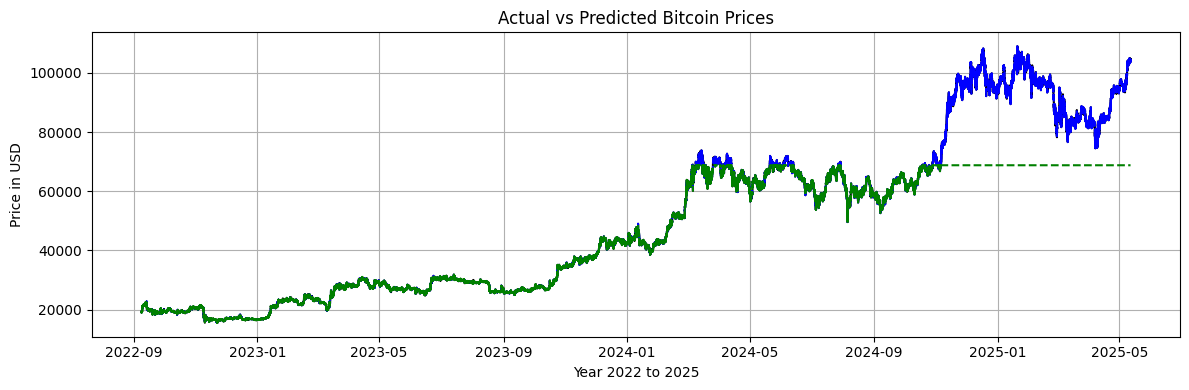

In [150]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a comparison DataFrame (remove .values from y_pred_knn)
comparison_df = pd.DataFrame({
    'Actual': y_test_b.values,  # y_test_b is a Pandas Series
    'Baseline_Predicted': y_pred_baseline.values,  # Also a Pandas Series
    'KNN_Predicted': y_pred_knn  # NumPy array, so no .values needed
}, index=y_test_b.index)

# Plot
plt.figure(figsize=(12,4))
plt.plot(comparison_df['Actual'], label='Actual Price', color='black')
plt.plot(comparison_df['Baseline_Predicted'], label='Baseline Predicted (Yesterday\'s Price)', color='blue', linestyle='--')
plt.plot(comparison_df['KNN_Predicted'], label='KNN Predicted', color='green', linestyle='--')
plt.title('Actual vs Predicted Bitcoin Prices')
plt.xlabel('Year 2022 to 2025')
plt.ylabel('Price in USD')
plt.grid(True)
plt.tight_layout()
plt.show()

For predicting Bitcoin’s closing price using historical data, we applied two models,


A Baseline model and a K-Nearest Neighbors (KNN) regression model. The Baseline model simply assumes that tomorrow’s price will be the same as today’s, serving as a naïve benchmark. It is useful for volatile assets like Bitcoin where short-term momentum may persist. The KNN model, on the other hand, is a non-parametric model that predicts a value by averaging the outcomes of the most similar historical instances, considering multiple lagged features.

When comparing performance, the Baseline model achieved an MSE of 1709.92 and an R² score of 0.99999, indicating extremely high accuracy but this may be misleading because it only shifts prices by one day and doesn't generalize or adapt. The KNN model, with an MSE of 122 million and R² of 0.83, performed worse numerically but is more flexible and attempts to learn from past patterns rather than blindly copying yesterday’s value.

1. Baseline Advantages
- Extremely simple to implement
- Surprisingly accurate in short term	

  Disadvantages
- Ignores trends, seasonality, and features
- Poor for long-term forecasting

2. KNN Model Advantages
- Learns patterns from multiple past observations
- Can incorporate additional features	

  Disadvantages
- Computationally expensive
- Sensitive to irrelevant features and scale


Use Linear Regression model as the new baseline.
Then compare it again with the KNN model using the same features.

In [152]:
# Step 1: Create lagged feature
df['Close_lag1'] = df['Close'].shift(1)
df_model = df.dropna(subset=['Close_lag1'])  # drop first row with NaN

# Features and target
X = df_model[['Close_lag1']]
y = df_model['Close']

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False)  # No shuffle for time series

Linear Regression Model (New Baseline)

In [153]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluate
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print("🔹 Linear Regression Model (New Baseline):")
print(f"MSE: {lr_mse:.2f}")
print(f"R² Score: {lr_r2:.4f}")

🔹 Linear Regression Model (New Baseline):
MSE: 1709.93
R² Score: 1.0000


KNN Model Using Same Feature

In [154]:
from sklearn.neighbors import KNeighborsRegressor

# Train KNN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict
y_pred_knn = knn_model.predict(X_test)

# Evaluate
knn_mse = mean_squared_error(y_test, y_pred_knn)
knn_r2 = r2_score(y_test, y_pred_knn)

print("\n🔹 KNN Model:")
print(f"MSE: {knn_mse:.2f}")
print(f"R² Score: {knn_r2:.4f}")


🔹 KNN Model:
MSE: 122428135.66
R² Score: 0.8300


Linear Regression outperformed KNN in predicting daily Bitcoin prices based on the previous day's price. It demonstrated superior accuracy and consistency, making it a more suitable choice as a baseline predictive model in this case. For future work, incorporating additional features and experimenting with more complex models like LSTM or ARIMA could further enhance performance.


Visualize Results (Linear Regression vs KNN)

C:\Users\wecda\AppData\Local\Temp\ipykernel_8604\630023517.py:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\wecda\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


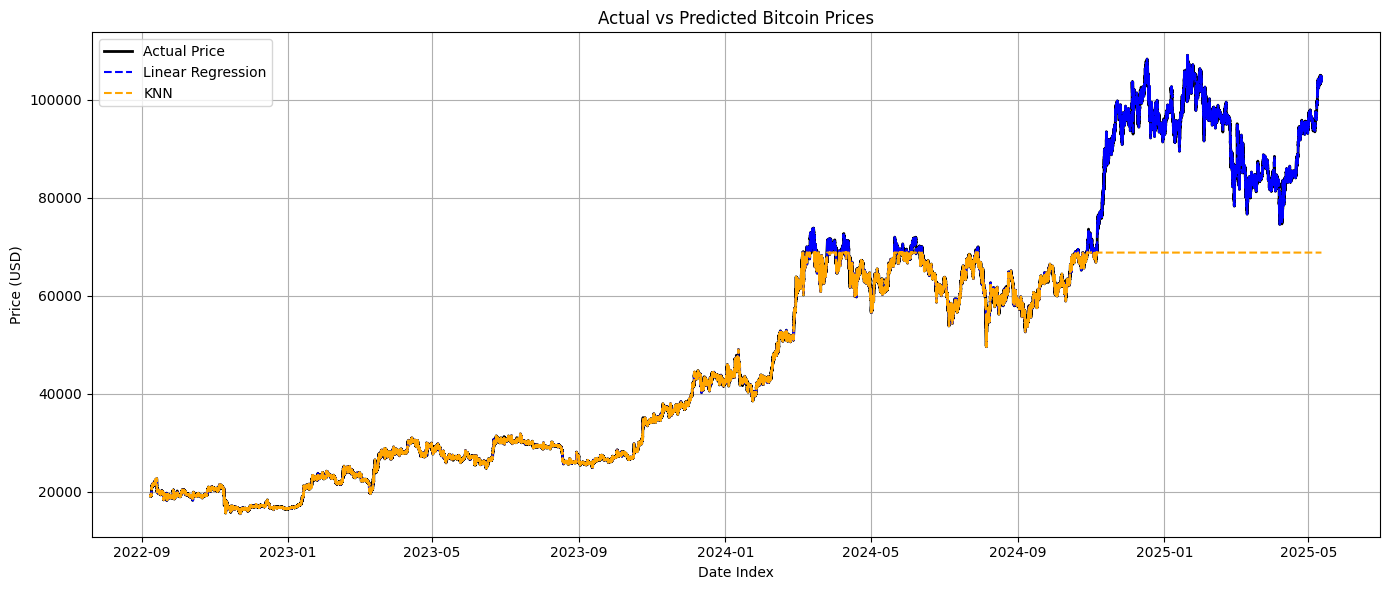

In [155]:
# Compare predictions
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Linear_Regression': y_pred_lr,
    'KNN': y_pred_knn
}, index=y_test.index)

plt.figure(figsize=(14, 6))
plt.plot(comparison_df['Actual'], label='Actual Price', color='black', linewidth=2)
plt.plot(comparison_df['Linear_Regression'], label='Linear Regression', linestyle='--', color='blue')
plt.plot(comparison_df['KNN'], label='KNN', linestyle='--', color='orange')
plt.title('Actual vs Predicted Bitcoin Prices')
plt.xlabel('Date Index')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [157]:
print(" Model Performance Comparison")
print("-------------------------------")
print(f"Linear Regression:")
print(f"  MSE     : {lr_mse:.2f}")
print(f"  R² Score: {lr_r2:.4f}")
print()
print(f"KNN Model:")
print(f"  MSE     : {knn_mse:.2f}")
print(f"  R² Score: {knn_r2:.4f}")

 Model Performance Comparison
-------------------------------
Linear Regression:
  MSE     : 1709.93
  R² Score: 1.0000

KNN Model:
  MSE     : 122428135.66
  R² Score: 0.8300


To predict the closing price of Bitcoin using historical data.

Linear Regression assumes a linear relationship between the previous day’s price and the next day's price, while KNN captures local patterns by looking at the closest data points in the feature space. The results show that Linear Regression achieved a significantly lower Mean Squared Error (MSE = 1709.93) and an almost perfect R² Score of 1.0000, indicating it fits the test data extremely well. On the other hand, the KNN model, although still reasonably good with an R² of 0.8300, performed much worse in terms of MSE (122 million+), suggesting it struggles to generalize on unseen data in this context.


Find the optimal k for the best prediction results.

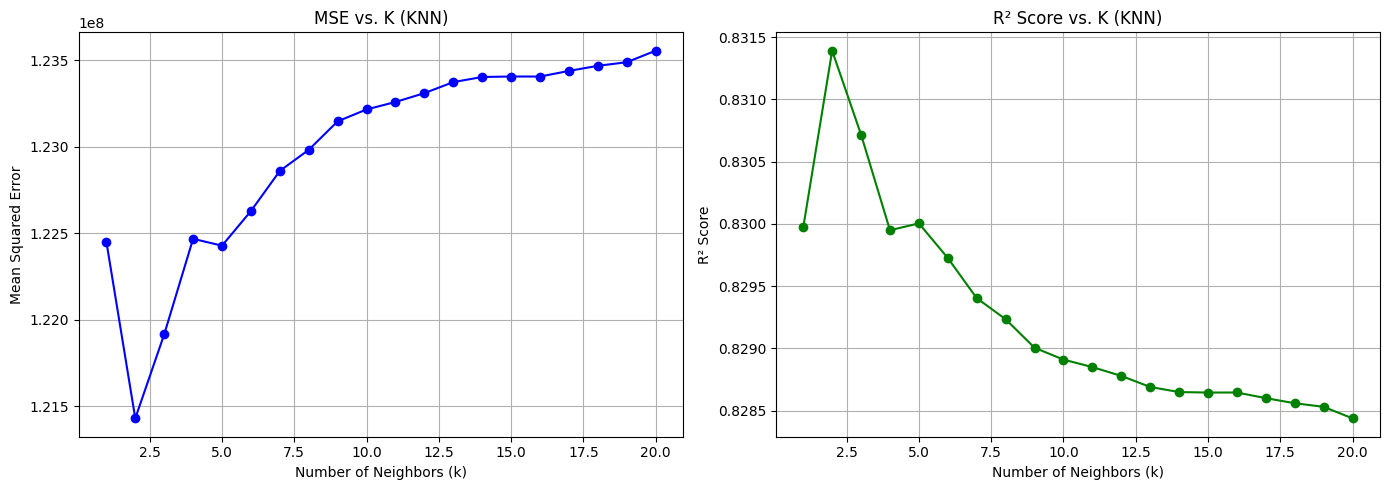

🔍 Best k based on MSE: 2
Minimum MSE: 121429062.79
R² at best k: 0.8314


In [158]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

# Prepare feature and target again
X = df_model[['Close_lag1']]
y = df_model['Close']

# Split the dataset
split_index = int(len(df_model) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Try different values of k
k_values = range(1, 21)
mse_scores = []
r2_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse_scores.append(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# Plotting the performance
plt.figure(figsize=(14, 5))

# MSE plot
plt.subplot(1, 2, 1)
plt.plot(k_values, mse_scores, marker='o', color='blue')
plt.title('MSE vs. K (KNN)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error')
plt.grid(True)

# R² Score plot
plt.subplot(1, 2, 2)
plt.plot(k_values, r2_scores, marker='o', color='green')
plt.title('R² Score vs. K (KNN)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('R² Score')
plt.grid(True)

plt.tight_layout()
plt.show()

# Best k value based on minimum MSE
best_k = k_values[mse_scores.index(min(mse_scores))]
print(f"🔍 Best k based on MSE: {best_k}")
print(f"Minimum MSE: {min(mse_scores):.2f}")
print(f"R² at best k: {r2_scores[mse_scores.index(min(mse_scores))]:.4f}")


To optimize the KNN model, we evaluated its performance using different values of k (number of neighbors) ranging from 1 to 20. We measured the Mean Squared Error (MSE) and R² Score for each configuration. The analysis revealed that:

Best k based on MSE: 2
Minimum MSE: 121,429,062.79
R² Score at best k: 0.8314

The error increases slightly for higher k values, indicating that too many neighbors can introduce noise.

R² Score vs. k
Peaks at k = 2, reinforcing that this value yields the best balance between bias and variance.

In conclusion, 

In this assignment we started with cleaning and exploring historical Bitcoin price data, then created lagged features to model price prediction. A baseline model using Linear Regression with a one day lag was developed, yielding excellent performance (MSE: 1709.93, R²: 1.0000). We then implemented a K-Nearest Neighbors (KNN) model, which initially performed worse but improved after tuning, with the best result at k=2 (MSE: 121.4 million, R²: 0.8314). We visualized actual vs. predicted values to compare model performance. Overall, Linear Regression outperformed KNN in predicting Bitcoin prices based on historical data.